Builder Agent Mermaid Diagram:
%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	analyze_request(analyze_request)
	generate_agent_json(generate_agent_json)
	validate_json(validate_json)
	repair_json(repair_json)
	save_json(save_json)
	compile_code(compile_code)
	__end__([<p>__end__</p>]):::last
	__start__ --> analyze_request;
	analyze_request --> generate_agent_json;
	compile_code --> __end__;
	generate_agent_json --> validate_json;
	repair_json --> validate_json;
	save_json --> compile_code;
	validate_json -. &nbsp;repair&nbsp; .-> repair_json;
	validate_json -. &nbsp;valid&nbsp; .-> save_json;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



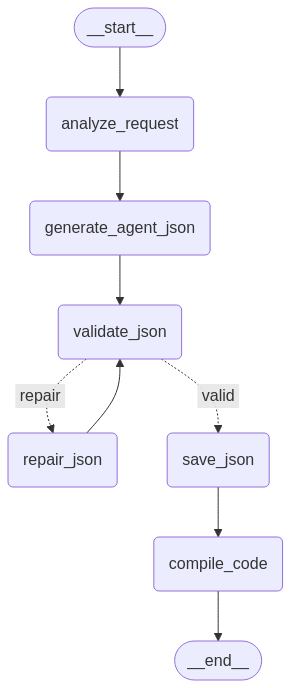


Builder Agent Graphviz Visualization:
To use graphviz visualization, install pygraphviz: pip install pygraphviz


In [1]:
# Visualize the builder agent
from builder_agent import create_builder_graph
from IPython.display import display, Image
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

# Load environment variables from .env file
from dotenv import load_dotenv
import os

# Load the .env file to set environment variables like OPENAI_API_KEY
load_dotenv()

# Verify that the API key is loaded
if not os.getenv("OPENAI_API_KEY"):
    print("Warning: OPENAI_API_KEY environment variable is not set.")
    print("Please create a .env file with your OpenAI API key or set it manually.")

# Create a builder agent instance
builder = create_builder_graph()

# Display the Mermaid diagram as text
print("Builder Agent Mermaid Diagram:")
print(builder.get_graph().draw_mermaid())

# Display the Mermaid diagram as PNG using the Mermaid.Ink API
display(
    Image(
        builder.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
            curve_style=CurveStyle.LINEAR,
            node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#f2f0ff"),
            wrap_label_n_words=9,
        )
    )
)

# Try to use graphviz if available
try:
    print("\nBuilder Agent Graphviz Visualization:")
    display(Image(builder.get_graph().draw_png()))
except ImportError:
    print(
        "To use graphviz visualization, install pygraphviz: pip install pygraphviz"
    )


In [2]:
# Use the builder agent to create a new agent from a natural language request

# Define the request for a web research agent
request = """
Create a trading agent that:
1. Fetches historical stock price data using a financial API
2. Implements a simple moving average crossover strategy
3. Simulates trading decisions for a fixed number of days
4. Tracks portfolio performance and executes trades automatically
5. Generates a performance report at the end
6. Terminates after completing the simulation

The agent should have a clear decision-making flow:
- Initialize with starting capital and trading parameters
- For each trading day:
  - Fetch latest market data
  - Calculate technical indicators (short and long moving averages)
  - Evaluate buy/sell signals based on crossover strategy
  - Make trading decision (buy, sell, or hold)
  - Update portfolio and track performance
  - Log transaction details
- After simulation period ends:
  - Calculate final portfolio value and returns
  - Generate performance metrics (profit/loss, win rate, etc.)
  - Output summary report
  - Terminate execution

The agent will run as a batch process from start to finish without requiring real-time monitoring, using an API to get historical data.





"""

# Set up the initial state for the builder
initial_state = {
    "request": request,
    "output_dir": "./generated_agents",
    "model_name": "o3-mini"  # You can change this to another model if needed
}

# Run the builder agent
result = builder.invoke(initial_state)

# Display the results
print("\nBuilder Agent Results:")
print(f"Agent JSON Path: {result.get('json_path', 'Not generated')}")
print(f"Agent Python Path: {result.get('py_path', 'Not generated')}")

# If the agent was successfully created, we can load and test it
if result.get('py_path') and os.path.exists(result.get('py_path', '')):
    print("\nAgent was successfully created!")
    
    # You could import and test the agent here
    # For example:
    # import importlib.util
    # import sys
    # 
    # # Extract the module name from the path
    # module_name = os.path.basename(result['py_path']).replace('.py', '')
    # spec = importlib.util.spec_from_file_location(module_name, result['py_path'])
    # module = importlib.util.module_from_spec(spec)
    # sys.modules[module_name] = module
    # spec.loader.exec_module(module)
    # 
    # # Get the agent from the module
    # agent = module.create_agent()
    # 
    # # Test the agent
    # test_result = agent.invoke({"input": "What is the latest news about AI?"})
    # print(test_result)
else:
    print("\nAgent creation failed or the file doesn't exist.")
    if result.get('error'):
        print(f"Error: {result['error']}")


Analyzing request...
Generating agent JSON definition...
Validating agent JSON...
Validation failed
Edge uses 'start' instead of 'START' constant: {'source': 'start', 'target': 'initialize'}
Edge uses 'end' instead of 'END' constant: {'source': 'generate_report', 'target': 'end'}
Syntax error in condition node 'loop_condition': invalid syntax (<unknown>, line 2)
Attempting to repair agent JSON...
Validating agent JSON...
Validation failed
Syntax error in condition node 'loop_condition': invalid syntax (<unknown>, line 2)
Initial repair attempt failed. Attempting deeper repair...
JSON repair successful.
Validating agent JSON...
Validation passed
Agent JSON saved to: ./generated_agents/tradingstrategysimulationagent.json
Compiling agent to Python code...
LangGraph code generated and saved to ./generated_agents/tradingstrategysimulationagent.py
Agent Python code saved to: ./generated_agents/tradingstrategysimulationagent.py

Builder Agent Results:
Agent JSON Path: ./generated_agents/tradi

In [4]:
# Load and visualize the generated agent
import importlib.util
import sys
from IPython.display import Image
import os
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

# Extract the module name from the path
if result.get('py_path') and os.path.exists(result.get('py_path', '')):
    # Get the module name from the path
    module_name = os.path.basename(result['py_path']).replace('.py', '')
    
    # Import the module dynamically
    spec = importlib.util.spec_from_file_location(module_name, result['py_path'])
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    
    # Create the agent
    agent = module.create_agent_graph()
    
    # Visualize the agent graph using Mermaid
    try:
        # Display the Mermaid diagram as text
        print("Generated Agent Mermaid Diagram:")
        print(agent.get_graph().draw_mermaid())
        
        # Display the Mermaid diagram as PNG using the Mermaid.Ink API
        display(
            Image(
                agent.get_graph().draw_mermaid_png(
                    draw_method=MermaidDrawMethod.API,
                    curve_style=CurveStyle.LINEAR,
                    node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#f2f0ff"),
                    wrap_label_n_words=9,
                )
            )
        )
        
        print("\nAgent loaded and visualized successfully!")
    except Exception as e:
        print(f"Error visualizing agent: {str(e)}")
else:
    print("Cannot visualize agent: Python file not found")


ValueError: Found edge starting at unknown node 'START'